<a href="https://colab.research.google.com/github/AtharvaJ-236/Data-Science/blob/main/DS_Prac_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Wine dataset.csv to Wine dataset.csv


In [ ]:
# Load libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load your dataset
df = pd.read_csv("Wine dataset.csv")

# 2. Select ONLY numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 3. Standardize the numeric feature matrix
X = StandardScaler().fit_transform(numeric_df)

# 4. Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# 5. Conduct PCA
X_pca = pca.fit_transform(X)

# 6. Show results
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_pca.shape[1])

# Optional: Show explained variance per component
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)


Original number of features: 14
Reduced number of features: 13

Explained variance ratio:
[0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458]


In [ ]:
# 2. Select ONLY numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 3. Standardize numeric data
X = StandardScaler().fit_transform(numeric_df)

# 4. Apply Kernel PCA (RBF Kernel)
kpca = KernelPCA(kernel="rbf", gamma=0.1, n_components=6)
X_kpca = kpca.fit_transform(X)

# 5. Show results
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_kpca.shape[1])

Original number of features: 14
Reduced number of features: 6


In [ ]:
# Load libraries
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# 1. Load your dataset
df = pd.read_csv("Wine dataset.csv")

# 2. Select ONLY numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 3. Separate features (X) and target (y)
# Assuming "class" column is your target
X = numeric_df.drop("class", axis=1).values
y = numeric_df["class"].values

# 4. Standardize features
X = StandardScaler().fit_transform(X)

# 5. Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=1)

# 6. Run LDA and transform the features
X_lda = lda.fit(X, y).transform(X)

# 7. Print the number of features
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_lda.shape[1])

# View the ratio of explained variance
print("Ratio of explained variance:",lda.explained_variance_ratio_)


Original number of features: 13
Reduced number of features: 1
Ratio of explained variance: [0.68747889]


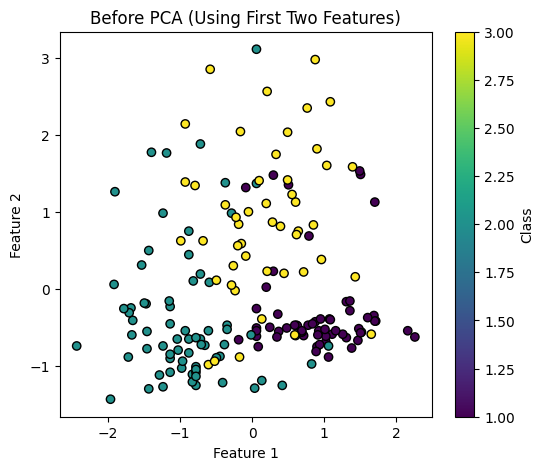

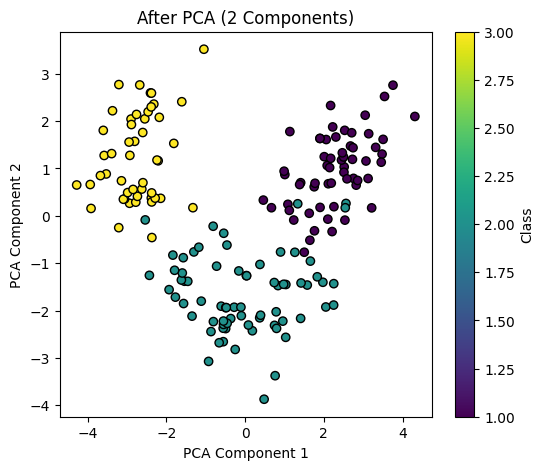

Explained Variance Ratio: [0.36198848 0.1920749 ]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load Wine Dataset
df = pd.read_csv("Wine dataset.csv")  # <-- change filename if needed

# 2. Extract Features (X) and Target (y)
X = df.drop('class', axis=1).values
y = df['class'].values

# 3. Standardize Features
X_scaled = StandardScaler().fit_transform(X)

# --------------------------
# BEFORE PCA (Original Space)
# --------------------------
# Use first two original features for visualization
X_before = X_scaled[:, :2]

plt.figure(figsize=(6, 5))
plt.title("Before PCA (Using First Two Features)")
plt.scatter(X_before[:, 0], X_before[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.show()

# --------------------------
# AFTER PCA (2 Components)
# --------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.title("After PCA (2 Components)")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Class")
plt.show()

# Explained Variance (Optional)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
